In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [9]:
df = pd.read_csv("Cyber Security Breaches1.csv")


In [10]:
df.head()


,Unnamed: 0,Number,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,breach_end,year
0,1,0,Brooke Army Medical Center,TX,NaN,1000,10/16/2009,Theft,Paper,2014-06-30,A binder containing the protected health infor...,2009-10-16,NaN,2009
1,2,1,"Mid America Kidney Stone Association, LLC",MO,NaN,1000,9/22/2009,Theft,Network Server,2014-05-30,Five desktop computers containing unencrypted ...,2009-09-22,NaN,2009
2,3,2,Alaska Department of Health and Social Services,AK,NaN,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2014-01-23,NaN,2009-10-12,NaN,2009
3,4,3,Health Services for Children with Special Need...,DC,NaN,3800,10/9/2009,Loss,Laptop,2014-01-23,A laptop was lost by an employee while in tran...,2009-10-09,NaN,2009
4,5,4,"L. Douglas Carlson, M.D.",CA,NaN,5257,9/27/2009,Theft,Desktop Computer,2014-01-23,A shared Computer that was used for backup was...,2009-09-27,NaN,2009


In [11]:
df.shape


(1055, 14)

In [12]:
df.dtypes


Unnamed: 0                           int64
Number                               int64
Name_of_Covered_Entity              object
State                               object
Business_Associate_Involved         object
Individuals_Affected                 int64
Date_of_Breach                      object
Type_of_Breach                      object
Location_of_Breached_Information    object
Date_Posted_or_Updated              object
Summary                             object
breach_start                        object
breach_end                          object
year                                 int64
dtype: object

In [13]:
df.columns

Index(['Unnamed: 0', 'Number', 'Name_of_Covered_Entity', 'State',
       'Business_Associate_Involved', 'Individuals_Affected', 'Date_of_Breach',
       'Type_of_Breach', 'Location_of_Breached_Information',
       'Date_Posted_or_Updated', 'Summary', 'breach_start', 'breach_end',
       'year'],
      dtype='object')

In [14]:
df.isnull().any()


Unnamed: 0                          False
Number                              False
Name_of_Covered_Entity              False
State                               False
Business_Associate_Involved          True
Individuals_Affected                False
Date_of_Breach                      False
Type_of_Breach                      False
Location_of_Breached_Information    False
Date_Posted_or_Updated              False
Summary                              True
breach_start                        False
breach_end                           True
year                                False
dtype: bool

In [15]:
df.isnull().sum()


Unnamed: 0                            0
Number                                0
Name_of_Covered_Entity                0
State                                 0
Business_Associate_Involved         784
Individuals_Affected                  0
Date_of_Breach                        0
Type_of_Breach                        0
Location_of_Breached_Information      0
Date_Posted_or_Updated                0
Summary                             913
breach_start                          0
breach_end                          910
year                                  0
dtype: int64

In [16]:
df.drop(['Business_Associate_Involved'], axis=1, inplace=True)
df.drop(['breach_end'], axis=1, inplace=True)



In [17]:
df.head()

,Unnamed: 0,Number,Name_of_Covered_Entity,State,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,year
0,1,0,Brooke Army Medical Center,TX,1000,10/16/2009,Theft,Paper,2014-06-30,A binder containing the protected health infor...,2009-10-16,2009
1,2,1,"Mid America Kidney Stone Association, LLC",MO,1000,9/22/2009,Theft,Network Server,2014-05-30,Five desktop computers containing unencrypted ...,2009-09-22,2009
2,3,2,Alaska Department of Health and Social Services,AK,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2014-01-23,NaN,2009-10-12,2009
3,4,3,Health Services for Children with Special Need...,DC,3800,10/9/2009,Loss,Laptop,2014-01-23,A laptop was lost by an employee while in tran...,2009-10-09,2009
4,5,4,"L. Douglas Carlson, M.D.",CA,5257,9/27/2009,Theft,Desktop Computer,2014-01-23,A shared Computer that was used for backup was...,2009-09-27,2009


In [18]:
table_year_df = df['year'].value_counts()


In [19]:
table_year_df


2013    254
2011    229
2012    227
2010    211
2009     56
2014     56
2008     13
2004      2
2005      2
1997      1
2003      1
2007      1
2006      1
2002      1
Name: year, dtype: int64

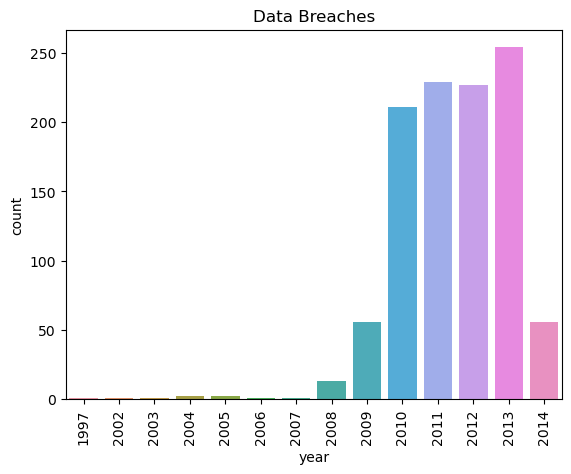

In [20]:
sns.countplot(x='year', data=df);
plt.title('Data Breaches')
plt.xticks(rotation=90);

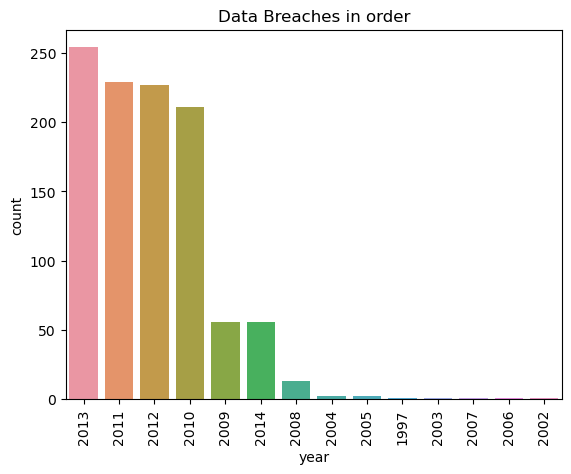

In [21]:
sns.countplot(x='year', data=df, order=table_year_df.index.values);
plt.title('Data Breaches in order')
plt.xticks(rotation=90);

In [22]:
table1 = df['Type_of_Breach'].value_counts()
table1

Theft                                                         516
Unauthorized Access/Disclosure                                148
Other                                                          91
Loss                                                           85
Hacking/IT Incident                                            75
Improper Disposal                                              38
Theft, Unauthorized Access/Disclosure                          26
Theft, Loss                                                    15
Unknown                                                        10
Unauthorized Access/Disclosure, Hacking/IT Incident             9
Unauthorized Access/Disclosure, Other                           8
Loss, Unauthorized Access/Disclosure                            5
Theft, Other                                                    5
Theft, Unauthorized Access/Disclosure, Hacking/IT Incident      3
Loss, Improper Disposal                                         3
Unknown, O

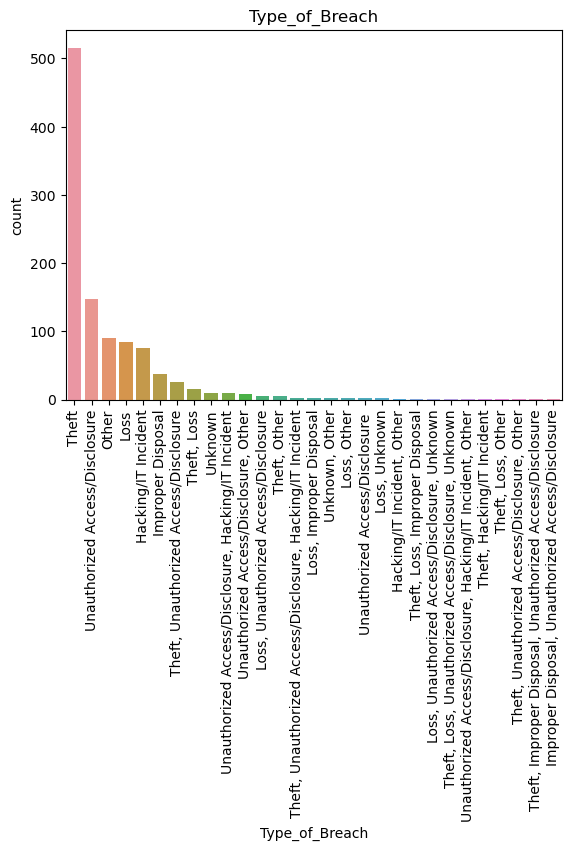

In [23]:
sns.countplot(x='Type_of_Breach', data=df, order = table1.index.values);
plt.title('Type_of_Breach')
plt.xticks(rotation=90);

In [24]:
table4 = df['State'].value_counts()
table4

CA    113
TX     83
FL     66
NY     58
IL     49
PA     40
IN     40
OH     33
TN     32
NC     32
MA     32
PR     31
GA     30
KY     26
MI     26
MO     25
WA     25
AZ     21
MN     21
NJ     20
CO     18
VA     18
MD     18
CT     17
OR     15
WI     14
SC     13
AL     12
AR     11
NM     10
NE      9
UT      9
DC      9
IA      8
LA      7
RI      7
KS      7
OK      6
WV      5
MS      5
NV      5
AK      5
WY      4
NH      4
MT      4
DE      3
ND      3
ID      2
HI      1
SD      1
ME      1
VT      1
Name: State, dtype: int64

In [25]:
State_counts = df['State'].value_counts().rename('State_counts')

df_State = df.merge(State_counts.to_frame(),
                                left_on='State',
                                right_index=True) 

In [26]:
df_State_upper = df_State[df_State.State_counts >= 15]


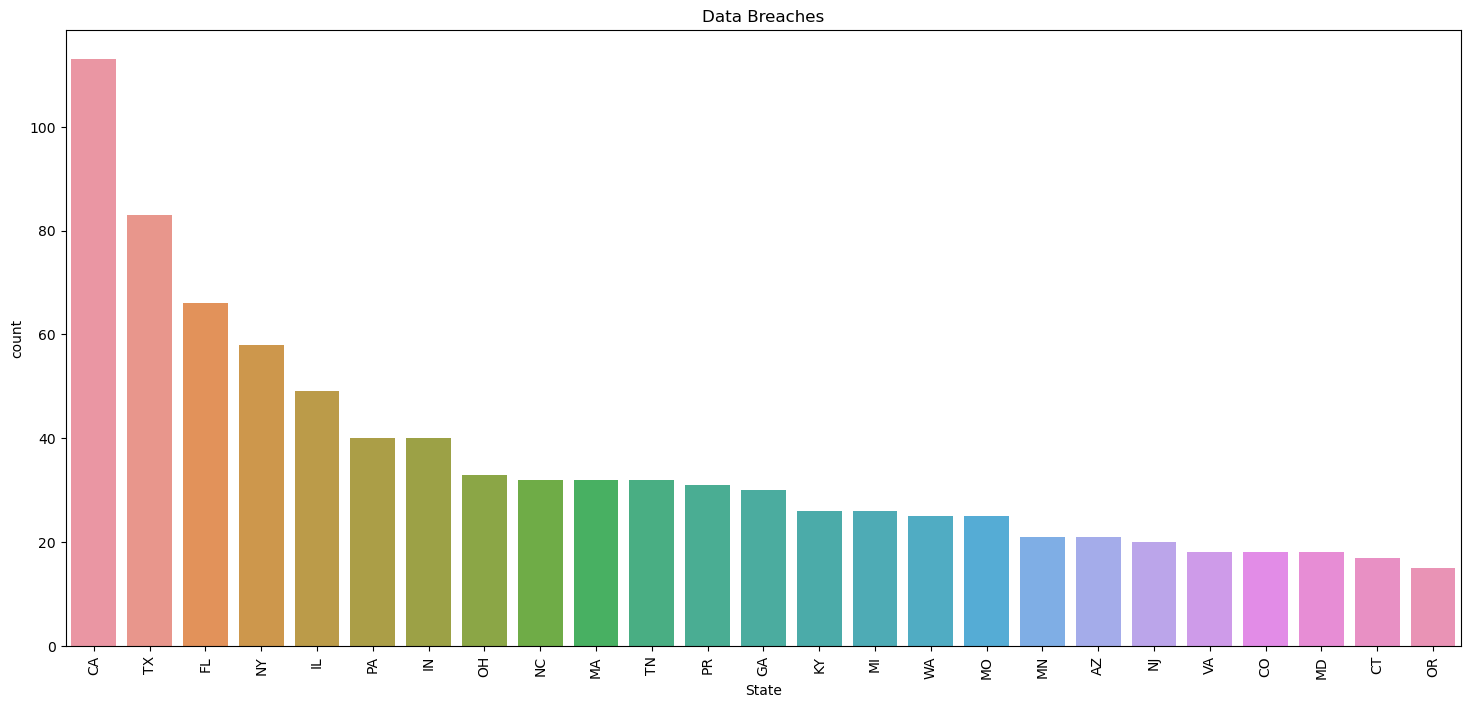

In [27]:
plt.figure(figsize=(18,8))
sns.countplot(data=df_State_upper, x='State', order = df_State_upper['State'].value_counts().index);
plt.title('Data Breaches')
plt.xticks(rotation=90);

In [28]:
df_2006 = df.loc[df['year']>2006]


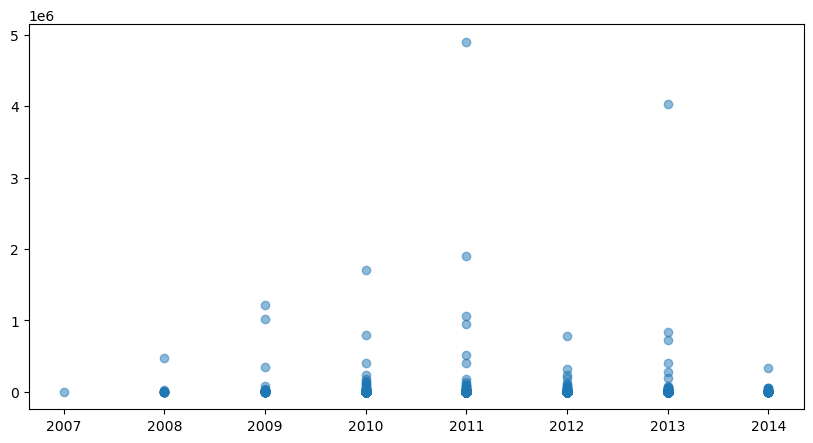

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(data = df_2006, y = 'Individuals_Affected', x = 'year', alpha=1/2);

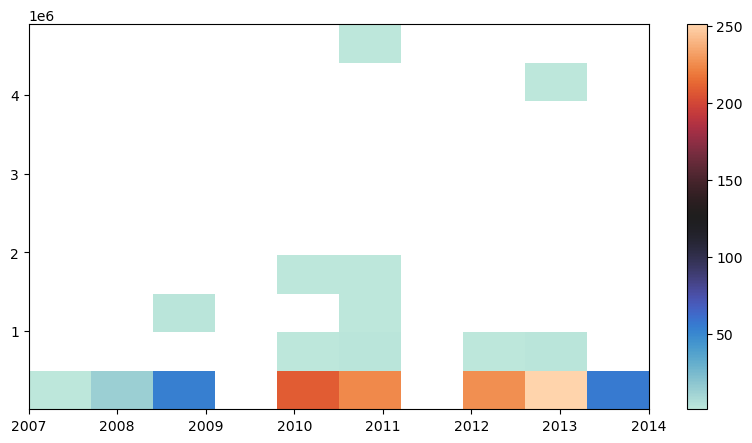

In [30]:
plt.figure(figsize=(10,5))
plt.hist2d(data = df_2006,  y = 'Individuals_Affected', x = 'year', cmin=0.5, cmap = 'icefire')
plt.colorbar();

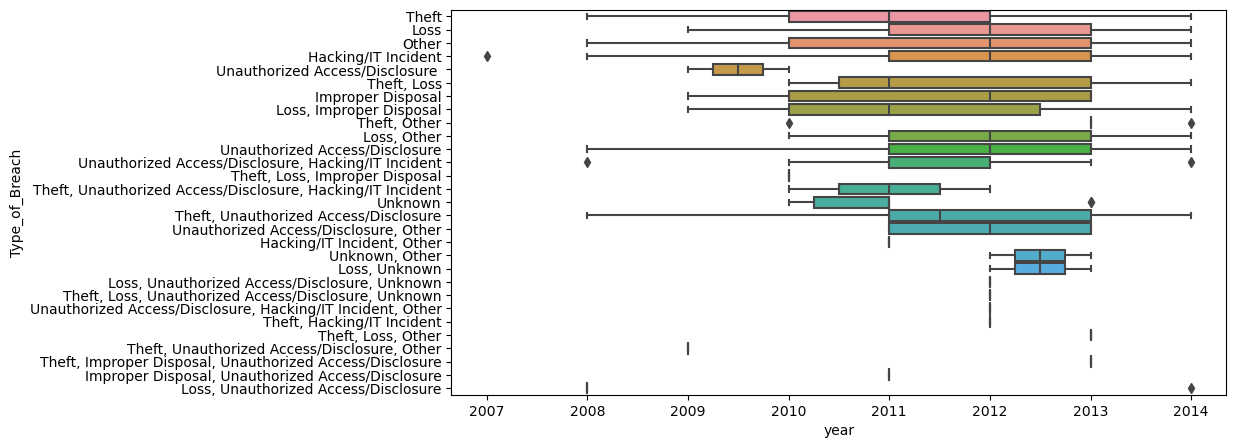

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_2006, y = 'Type_of_Breach', x = 'year');

In [32]:
df_heatmap = df.copy(deep=True)


In [59]:
le = LabelEncoder()

df_heatmap['State'] = le.fit_transform(df_heatmap['State'])
df_heatmap['Date_of_Breach'] = le.fit_transform(df_heatmap['Date_of_Breach'])
df_heatmap['Type_of_Breach'] = le.fit_transform(df_heatmap['Type_of_Breach'])
df_heatmap['Location_of_Breached_Information'] = le.fit_transform(df_heatmap['Location_of_Breached_Information'])
df_heatmap['Name_of_Covered_Entity'] = le.fit_transform(df_heatmap['Name_of_Covered_Entity'])
df_heatmap['Name_of_Covered_Entity'] = le.fit_transform(df_heatmap['Name_of_Covered_Entity'])


In [60]:
df.head()

,Unnamed: 0,Number,State,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,year
0,1,0,TX,1000,10/16/2009,Theft,Paper,2014-06-30,A binder containing the protected health infor...,2009-10-16,2009
1,2,1,MO,1000,9/22/2009,Theft,Network Server,2014-05-30,Five desktop computers containing unencrypted ...,2009-09-22,2009
2,3,2,AK,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2014-01-23,NaN,2009-10-12,2009
3,4,3,DC,3800,10/9/2009,Loss,Laptop,2014-01-23,A laptop was lost by an employee while in tran...,2009-10-09,2009
4,5,4,CA,5257,9/27/2009,Theft,Desktop Computer,2014-01-23,A shared Computer that was used for backup was...,2009-09-27,2009


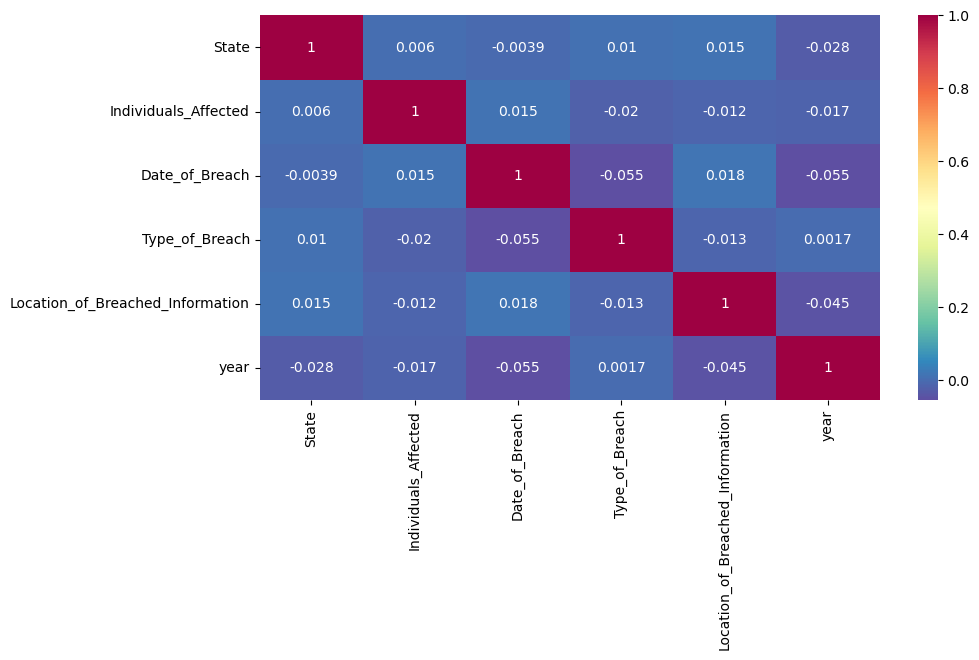

In [61]:
plt.figure(figsize=(10,5))
sns.heatmap(df_heatmap[['State', 'Individuals_Affected', 'Date_of_Breach', 'Type_of_Breach', 
                 'Location_of_Breached_Information', 'year']].corr(), cmap='Spectral_r', annot=True);